In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [5]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [6]:
df=data.loc['0':'207']

In [7]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [8]:
X1 = df[['PM2.5y1','PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'COy1','WSy1', 'ATy1','PM2.5y2','PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'COy2','WSy2', 'ATy2','PM2.5y3','PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'COy3','WSy3', 'ATy3','year', 'month', 'day']]
Y1 = df['PM2.5']

In [60]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=24)

In [61]:
grad_boost = GradientBoostingRegressor(n_estimators=2000,
                                      max_depth=8,
                                      max_features=0.1,
                                      min_samples_split=4,
                                      min_samples_leaf=5,
                                      learning_rate=0.001)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.001, max_depth=8, max_features=0.1,
                          min_samples_leaf=5, min_samples_split=4,
                          n_estimators=2000)

In [62]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.8978989067910015

Score on test data: 0.705171015940316

Root Mean Squared Error: 35.531157798063575

Overall model accuracy: 0.705171015940316


In [63]:
test=data.loc['207':'259']
X=test[['PM2.5y1','PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'COy1','WSy1', 'ATy1','PM2.5y2','PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'COy2','WSy2', 'ATy2','PM2.5y3','PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'COy3','WSy3', 'ATy3','year', 'month', 'day']]
X

,PM2.5y1,PM1y1,NOy1,NO2y1,NOxy1,NH3y1,COy1,WSy1,ATy1,PM2.5y2,...,NOy3,NO2y3,NOxy3,NH3y3,COy3,WSy3,ATy3,year,month,day
207,302.818571,428.861429,125.535714,76.847143,144.901429,32.607143,2.175714,0.645714,8.394286,217.428571,...,100.627143,83.730000,212.015714,56.007143,2.998571,1.072857,12.122857,2019,12,29
208,316.292857,456.537143,109.870000,52.067143,117.267143,29.011429,1.537714,0.671429,8.800000,264.292857,...,98.832857,67.225714,194.864286,57.234286,3.004286,0.885714,10.478571,2020,1,5
209,241.932857,349.680000,84.832857,58.215714,100.144286,31.015714,0.970000,0.888571,11.971429,191.864286,...,101.944286,57.842857,190.755714,48.108571,2.867143,0.792857,12.764286,2020,1,12
210,253.915714,405.144286,117.140000,58.545714,126.631429,28.408571,1.768000,0.818571,9.905714,237.660000,...,94.412857,75.028571,195.770000,43.388571,2.740000,0.822857,8.177143,2020,1,19
211,128.998571,223.215604,34.865714,44.648571,52.171429,23.565714,2.566000,0.965714,10.632857,173.172857,...,49.015714,68.434286,127.910000,44.487143,1.844286,0.955714,9.742857,2020,1,26
212,187.365714,225.330769,47.905714,49.550000,65.417143,23.558571,2.305429,1.020000,9.834286,143.550000,...,74.012857,62.091429,156.391429,42.347143,2.127143,1.098571,13.330000,2020,2,2
213,146.527143,198.920769,65.595714,50.381429,80.275714,22.507143,1.334286,1.088571,11.920000,193.068571,...,153.021429,66.960000,268.622857,39.584286,2.754286,1.011429,13.437143,2020,2,9
214,193.267143,333.581429,73.142857,72.708571,98.288571,27.225714,1.971429,0.791429,13.324286,109.957143,...,50.672857,67.874286,129.678571,30.340000,1.890000,1.112857,13.547143,2020,2,16
215,110.288571,192.155714,68.825714,73.708571,96.087143,27.742857,1.424286,1.167143,15.858571,166.732857,...,34.234286,82.401429,120.168571,37.265714,1.715714,1.247143,16.775714,2020,2,23
216,108.875000,172.547857,86.743571,88.330000,117.698571,27.334286,1.810714,0.940000,12.517143,109.975714,...,38.925714,62.438571,108.778571,26.370000,1.704286,1.481429,17.097143,2020,3,1


In [64]:
predict=grad_boost.predict(X)

In [65]:
predict

array([177.74375757, 166.79895121, 148.28602997, 186.69597755,
       142.26870758, 116.01935703, 145.20068167, 109.97303733,
       117.84174222, 103.50705742,  96.56460023,  93.71196664,
        84.70621788,  94.35452853,  91.27481448,  85.32659162,
        99.38844696, 113.88921736,  79.80431839, 108.50135591,
        88.6426075 ,  92.99618571,  88.03953254,  72.31174438,
        83.71977166,  75.58426141,  71.64785521,  69.37698793,
        68.51161927,  55.71728894,  51.82754202,  54.97311747,
        57.68156228,  57.34310279,  52.85516446,  54.11156343,
        58.64126424,  57.19949413,  57.66286398,  66.76761022,
        89.57366887, 104.51332964, 108.01183286, 142.78388279,
       149.8563459 , 153.68558955, 200.07268963, 167.8213436 ,
       169.97016037, 189.42904528, 183.02010511, 170.66278663,
       189.38095956])

In [66]:
dates=data.loc['207':'259','From Date']

In [67]:
X['From Date']=dates.values

In [68]:
X.columns

Index(['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'COy1', 'WSy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'COy2',
       'WSy2', 'ATy2', 'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3',
       'COy3', 'WSy3', 'ATy3', 'year', 'month', 'day', 'From Date'],
      dtype='object')

In [69]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [70]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [71]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [72]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

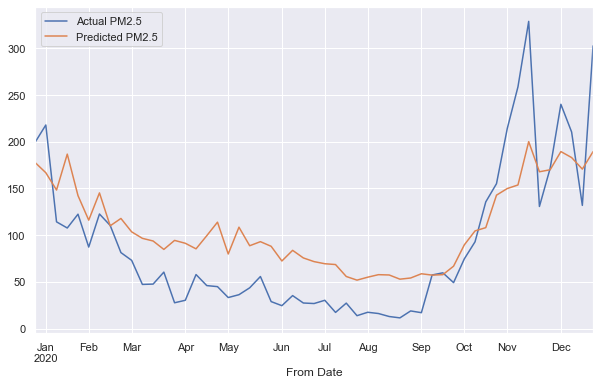

In [73]:
test['PM2.5'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted PM2.5')

In [74]:
np.sqrt(mean_squared_error(test['PM2.5'],X['pred']))

49.14874027839879

In [75]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 26.44422808312234
MSE: 1262.463174470894
RMSE: 35.531157798063575
R-Squared: 0.705171015940316


In [76]:
mae = metrics.mean_absolute_error(test['PM2.5'],X['pred'])
mse = metrics.mean_squared_error(test['PM2.5'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['PM2.5'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 41.95173758683357
MSE: 2415.5986709534995
RMSE: 49.14874027839879
R-Squared: 0.615034901806647


In [77]:
import pickle
filename = 'PM2.5_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [78]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.705171015940316


# 3rd plot

In [79]:
testcase = pd.DataFrame()

In [80]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [81]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [82]:
testcase

,test,pred,Corrected
152,234.834286,200.419315,235.950473
14,93.437143,99.153532,63.622374
207,199.317143,177.743758,213.274915
189,44.624286,55.918030,20.386872
112,109.975714,118.439813,82.908655
121,72.604286,126.142068,90.610911
54,216.040000,183.771249,219.302407
159,128.998571,190.674697,155.143540
26,40.867143,60.450012,24.918854
122,118.565714,131.383205,95.852047


In [83]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [84]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.863086654612012

In [85]:
test2020=pd.DataFrame()

In [86]:
test2020['test']=test['PM2.5']
test2020['pred']=X['pred']

In [87]:
test2020.index=test.index

In [88]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

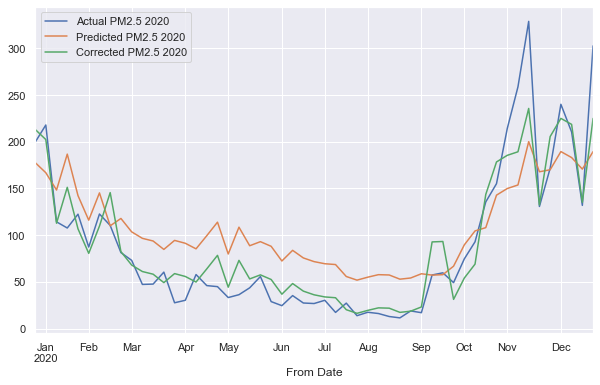

In [89]:
test2020['test'].plot(legend=True, label='Actual PM2.5 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted PM2.5 2020')
test2020["Corrected"].plot(legend=True, label='Corrected PM2.5 2020')

In [90]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.841209118778476